Импорт всех необходимых библиотек

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

In [72]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
print('всего было пассажиров:', data.shape[0])
print('Средний возраст пассажиров: ', round(data['Age'].mean(),1))
print('количество мужчин:', data[data['Sex'] == 'male'].shape[0])
print('Средний возраст мужчин: ', round(data[data['Sex'] == 'male'].Age.mean(), 1))
print('Количество женщин:', data[data['Sex'] == 'female'].shape[0])
print('Средний возраст женщин: ', round(data[data['Sex'] == 'female'].Age.mean(), 1))

print('Погибло пассажиров:', data[data['Survived'] == 0].shape[0])
print('Выжило пассажиров:', data[data['Survived'] == 1].shape[0])
print('Выжило мужчин:', data[(data['Survived'] == 1) & (data['Sex'] == 'male')].shape[0])
print('Средний возраст выживших мужчин: ', round(data[(data['Sex'] == 'male') & (data['Survived'] == 1)].Age.mean(),1))
print('Выжило женщин:', data[(data['Survived'] == 1) & (data['Sex'] == 'female')].shape[0])
print('Средний возраст выживших женщин: ', round(data[(data['Sex'] == 'female') & (data['Survived'] == 1)].Age.mean(),1))
print('Процент выживших пассажиров относительно общего количества:', 
      round(data[data['Survived'] == 1].shape[0] / data.shape[0] * 100, 1),'%')
print('Количественная разница между погибшими и выжившими людьми:', 
      data[data['Survived'] == 0].shape[0] - data[data['Survived'] == 1].shape[0])
print('Процент выживших мужчин относительно всех мужчин:',
      round(data[data['Sex'] == 'male']['Survived'].mean() * 100, 1), '%')
print('Процент выживших женщин относительно всех женщин:',
      round(data[data['Sex'] == 'female']['Survived'].mean() * 100, 1), '%')

всего было пассажиров: 891
Средний возраст пассажиров:  29.7
количество мужчин: 577
Средний возраст мужчин:  30.7
Количество женщин: 314
Средний возраст женщин:  27.9
Погибло пассажиров: 549
Выжило пассажиров: 342
Выжило мужчин: 109
Средний возраст выживших мужчин:  27.3
Выжило женщин: 233
Средний возраст выживших женщин:  28.8
Процент выживших пассажиров относительно общего количества: 38.4 %
Количественная разница между погибшими и выжившими людьми: 207
Процент выживших мужчин относительно всех мужчин: 18.9 %
Процент выживших женщин относительно всех женщин: 74.2 %


In [74]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


## Первые выводы
* И процент и количество погибших людей в результате крушения очень велико. Менее 40% людей смогло спастисть.
* В процентном отношении женщин выжило гараздо больше, чем мужчин. Это связано с тем, что во время крушения люди повели себя организовано и пытались в первую очередь спасти женщин и детей.
* Так же не смотря на то, что мужчин было почти в два раза больше, чем мужчин, женщин даже в количественном отношение выжило больше, что еще раз говорит об организованном бегстве с корабля.
* Среди мужчин выжили более молодые мужчины, что обусловленно более крепким здоровьем.
* Самому маленькому пассажиру не было и года, а самому старому было 80 лет

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Визуальный и статистический анализ данных

<AxesSubplot:xlabel='Age', ylabel='Count'>

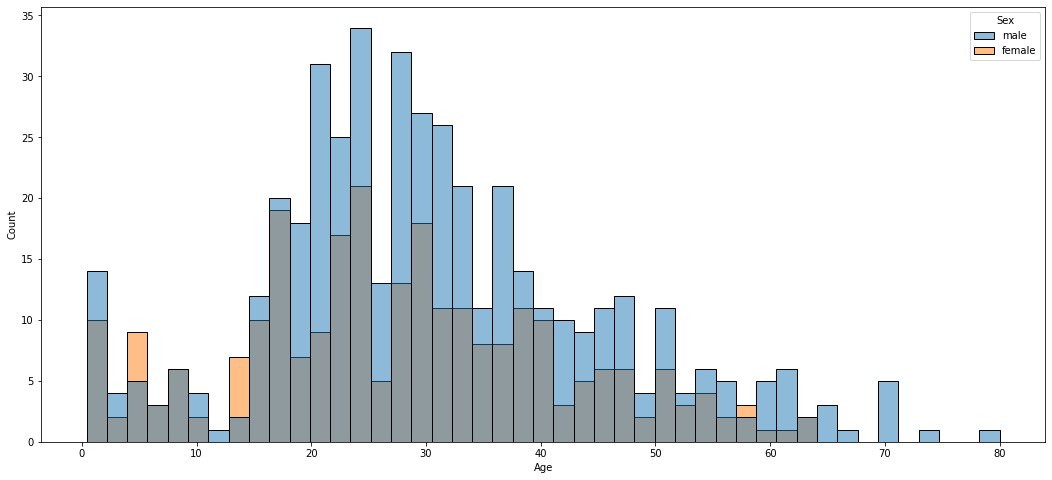

In [76]:
plt.figure(figsize=(18,8))
sns.histplot(data = data, x="Age", hue="Sex", bins=45)

<AxesSubplot:xlabel='Age', ylabel='Count'>

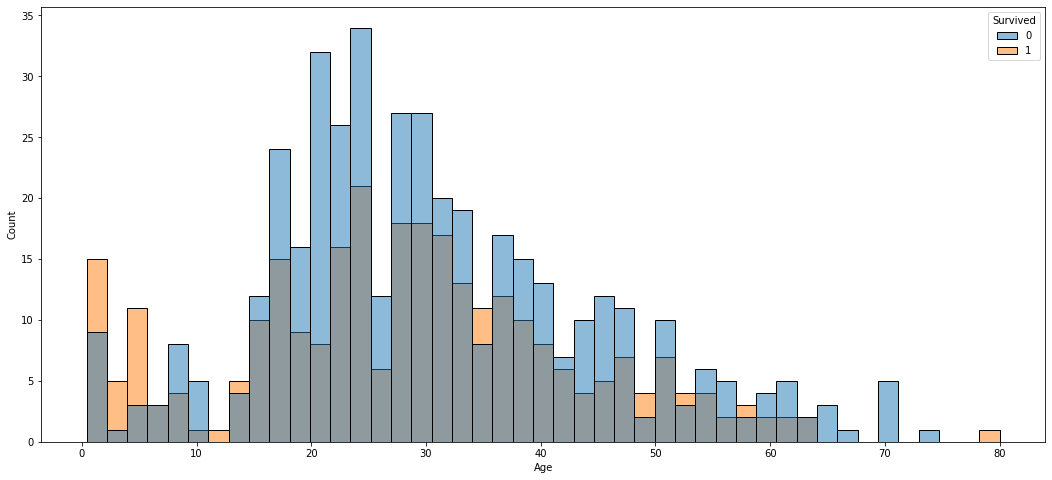

In [77]:
plt.figure(figsize=(18,8))
sns.histplot(data = data, x="Age", hue='Survived', bins=45)

# Заполнение пропусков и обработка выбросов в данных

In [78]:
data.Age.fillna(data.Age.median(), inplace=True)

In [79]:
data.Survived.fillna(data.Survived.median(), inplace=True)

In [80]:
data.Pclass.fillna(data.Pclass.median(), inplace=True)

In [81]:
data.Parch.fillna(data.Parch.median(), inplace=True)

In [82]:
data.SibSp.fillna(data.Parch.median(), inplace=True)

In [83]:
data.Fare.fillna(data.Fare.median(), inplace=True)

In [84]:
data.Name.fillna(data.Name.mode()[0], inplace=True)

In [85]:
data.Sex.fillna(data.Sex.mode()[0], inplace=True)

In [86]:
data.Cabin.fillna(data.Cabin.mode()[0], inplace=True)

In [87]:
data.Ticket.fillna(data.Ticket.mode()[0], inplace=True)

In [88]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Выбросы

In [91]:
data.select_dtypes(include=["int", "float"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [92]:
data.select_dtypes(include=["int", "float"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.3616,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,13.0197,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,22.0000,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,35.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


<AxesSubplot:xlabel='Age'>

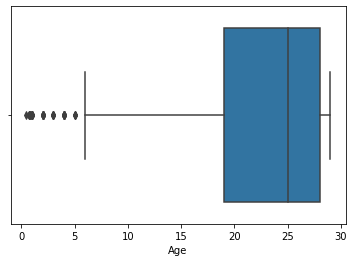

In [93]:
sns.boxplot(x=data[data["Age"] < 30]["Age"])

<AxesSubplot:xlabel='Age'>

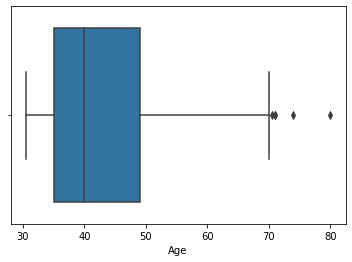

In [94]:
sns.boxplot(x=data[data["Age"] > 30]["Age"])

<AxesSubplot:xlabel='Fare'>

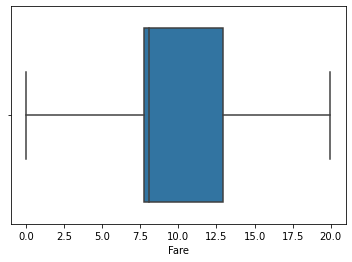

In [95]:
sns.boxplot(x=data[data["Fare"] < 20]["Fare"])

<AxesSubplot:xlabel='Fare'>

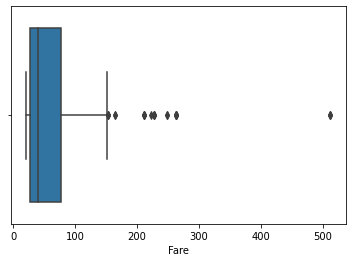

In [96]:
sns.boxplot(x=data[data["Fare"] > 20]["Fare"])

# Преобразование признаков

In [131]:
data_copy = data.copy()
data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
pd.get_dummies(data=data, columns=["Sex"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,B96 B98,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [139]:
gdf = data_copy.groupby("Sex").Survived.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"Survived":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.Survived == 1].sort_values("rate", ascending=True)
gdf = gdf[gdf.Survived == 0].sort_values("rate", ascending=False)
gdf

,Sex,Survived,rate
2,male,0,0.8111
1,female,0,0.2580


In [140]:
gdf_

,Sex,Survived,rate
3,male,1,0.1889
0,female,1,0.7420


In [141]:
gdf_[~gdf_.Sex.isin(gdf.Sex.values)] #??

,Sex,Survived,rate


In [143]:
class_ = gdf_[~gdf_.Sex.isin(gdf.Sex.values)].Sex.values
Sex_mapper = {k:v for v, k in enumerate(np.hstack((gdf.Sex.values, class_)))}
Sex_mapper

{'male': 0, 'female': 1}

In [144]:
data_copy.Sex = data_copy.Sex.map(Sex_mapper)
data_copy.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
538,539,0,3,"Risien, Mr. Samuel Beard",0,28.0,0,0,364498,14.5,B96 B98,S


In [157]:
gdf = data_copy.groupby("Embarked").Survived.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"Survived":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.Survived == 1].sort_values("rate", ascending=True)
gdf = gdf[gdf.Survived == 0].sort_values("rate", ascending=False)
gdf

,Embarked,Survived,rate
0,0,0,0.6610
2,1,0,0.6104
5,2,0,0.4464


In [158]:
gdf_[~gdf_.Embarked.isin(gdf.Embarked.values)]

,Embarked,Survived,rate


In [160]:
Embarked_ = gdf_[~gdf_.Embarked.isin(gdf.Embarked.values)].Embarked.values
Embarked_mapper = {k:v for v, k in enumerate(np.hstack((gdf.Embarked.values, Embarked_)))}
data_copy.Embarked = data_copy.Embarked.map(Embarked_mapper)
data_copy.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
135,136,0,2,"Richard, Mr. Emile",0,23.0,0,0,SC/PARIS 2133,15.0458,B96 B98,2


In [150]:
gdf = data_copy.groupby("Age").Survived.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"Survived":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.Survived == 1].sort_values("rate", ascending=True)
gdf = gdf[gdf.Survived == 0].sort_values("rate", ascending=False)
gdf

,Age,Survived,rate
77,34.5,0,1.0000
124,57.0,0,1.0000
61,28.5,0,1.0000
66,30.5,0,1.0000
82,36.5,0,1.0000
...,...,...,...
15,6.0,0,0.3333
12,4.0,0,0.3000
6,1.0,0,0.2857
31,15.0,0,0.2000


In [151]:
gdf_[~gdf_.Age.isin(gdf.Age.values)]

,Age,Survived,rate
116,53.00,1,1.0
0,0.42,1,1.0
26,13.00,1,1.0
25,12.00,1,1.0
13,5.00,1,1.0
4,0.92,1,1.0
3,0.83,1,1.0
2,0.75,1,1.0
1,0.67,1,1.0
133,63.00,1,1.0


In [164]:
gdf = data_copy.groupby("Fare").Survived.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"Survived":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.Survived == 1].sort_values("rate", ascending=True)
gdf = gdf[gdf.Survived == 0].sort_values("rate", ascending=False)
gdf

,Fare,Survived,rate
144,17.8000,0,1.0000
161,21.0750,0,1.0000
108,12.8750,0,1.0000
106,12.5250,0,1.0000
211,32.3208,0,1.0000
...,...,...,...
221,35.5000,0,0.2500
323,227.5250,0,0.2500
210,31.3875,0,0.2500
204,30.5000,0,0.2000


In [165]:
gdf_[~gdf_.Fare.isin(gdf.Fare.values)]

,Fare,Survived,rate
294,86.5000,1,1.0
62,8.1125,1,1.0
291,83.1583,1,1.0
70,8.5167,1,1.0
288,81.8583,1,1.0
...,...,...,...
249,52.5542,1,1.0
102,12.2875,1,1.0
167,23.2500,1,1.0
105,12.4750,1,1.0


In [166]:
Fare_ = gdf_[~gdf_.Fare.isin(gdf.Fare.values)].Fare.values
Fare_mapper = {k:v for v, k in enumerate(np.hstack((gdf.Fare.values, Fare_)))}
data_copy.Fare = data_copy.Fare.map(Fare_mapper)
data_copy.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",1,22.0,0,0,370373,117,B96 B98,1


In [113]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          0 non-null      float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         0 non-null      float64
 10  Cabin        891 non-null    object 
 11  Embarked     0 non-null      float64
dtypes: float64(4), int64(5), object(3)
memory usage: 83.7+ KB


In [167]:
data_copy[data_copy.Survived.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#  Шкалирование данных

In [168]:
sc = StandardScaler()
X_ = sc.fit_transform(data_copy.select_dtypes(exclude=(object)))
X_

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.44344925, -0.58595414],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
         1.65085683,  1.9423032 ],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.47367361,
         0.02402979, -0.58595414],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  2.00893337,
        -1.73369139, -0.58595414],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
         1.0337845 ,  1.9423032 ],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.06946602,  0.67817453]])

In [169]:
rs = RobustScaler()
Xr = rs.fit_transform(data_copy.select_dtypes(exclude=(object)))
Xr

array([[-1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.34482759,  0.        ],
       [-0.99775281,  1.        , -2.        , ...,  0.        ,
         1.5862069 ,  2.        ],
       [-0.99550562,  1.        ,  0.        , ...,  0.        ,
         0.0862069 ,  0.        ],
       ...,
       [ 0.99550562,  0.        ,  0.        , ...,  2.        ,
        -1.53448276,  0.        ],
       [ 0.99775281,  1.        , -2.        , ...,  0.        ,
         1.01724138,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

# Baseline решение

In [170]:
X = data.select_dtypes(include=(int, float))
y = data.Survived

In [171]:
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [173]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [174]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

In [175]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\Егор\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [176]:
logreg.score(X_test, y_test)

1.0

# Решение c преобразованиtv признаков. Но без шкалирования признаков

In [177]:
X = data_copy.select_dtypes(exclude=(object))
y = data_copy.Survived

In [178]:
data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,97,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,209,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,122,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,156,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,99,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,120,B96 B98,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,176,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,28,B96 B98,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,176,C148,2


In [179]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [181]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [182]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

In [183]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\Егор\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [184]:
logreg.score(X_test, y_test)

1.0

# Шкалированные данные

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [186]:
y_train.value_counts(normalize=True)

0    0.6166
1    0.3834
Name: Survived, dtype: float64

In [187]:
y_test.value_counts(normalize=True)

0    0.6145
1    0.3855
Name: Survived, dtype: float64

In [188]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

1.0

In [189]:
best_score = logreg.score(X_test, y_test)
best_score

1.0

In [190]:
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [191]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

1.0

In [192]:
logreg.score(X_test, y_test)

1.0

In [193]:
predict = logreg.predict(X_test)
predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [196]:
features_name = data_copy.select_dtypes(exclude=["object"]).columns
print(f"Параметр b0: {logreg.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name, logreg.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-4.11349752]
Значениея остальных параметров бетта:
Survived 6.496626543165583
Fare 1.3639643138824311
Sex 1.0723614023565222
Age -0.2432400318868093
Pclass -0.1541440098869803
Parch -0.12337238071188049
SibSp -0.0926142669000453
PassengerId -0.06038673682953016
Embarked 0.0093924861520712


In [197]:
np.where(np.abs(logreg.coef_[0]) > 0.5)[0]

array([1, 3, 7], dtype=int64)

In [198]:
threshold = 0.2
print(len(np.where(np.abs(logreg.coef_[0]) > threshold)[0]), X_.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
logreg_ = LogisticRegression(random_state=42)
logreg_.fit(X_train, y_train)
print(logreg_.score(X_train, y_train))
print(logreg_.score(X_test, y_test))
print(f"first best score: {best_score}")
logreg_.score(X_test, y_test) > best_score

4 9
1.0
1.0
first best score: 1.0


False

In [199]:
data_copy.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns

Index(['Survived', 'Sex', 'Age', 'Fare'], dtype='object')

In [200]:
features_name_ = data_copy.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns
print(f"Параметр b0: {logreg_.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name_, logreg_.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-1.39785893]
Значениея остальных параметров бетта:
Survived 4.3483422062430375
Fare 0.9608582370103368
Sex 0.5235941421014202
Age -0.12304281524072654
